In [3]:
#                                                         Outliers
# points that deviate significantly from the rest of the dataset. 
# ML algorithms involving weights calculation are comparatively more sensitive to outliers . eg Linear/logistic regression, Adaboost, DL etc
# Decision tree, random forest, XG boost, gradient boost etc are comparatively less sensitive to outliers 
# Outliers are not always harmful. They can be important sometimes and various circumstances 
# Addressing outliers is important 

In [6]:
# Techniques to handle outliers 
# 1. Trimming ----> if found remove 
# 2. Capping  ----> setting max and minimum limits to convert outliers to max and min dataset
# 3. Treating as missing values and filling with appropriate techniques 
# 4. Discretization 

In [7]:
#                                         A. Outlier Detection and Removal using Z-score Method 
# Assumption : Distribution must be normal or about normal. mean +- 3 S.D contain 99.7% population so data outside this range is outlier


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('csv files/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [13]:
df.shape

(1000, 3)

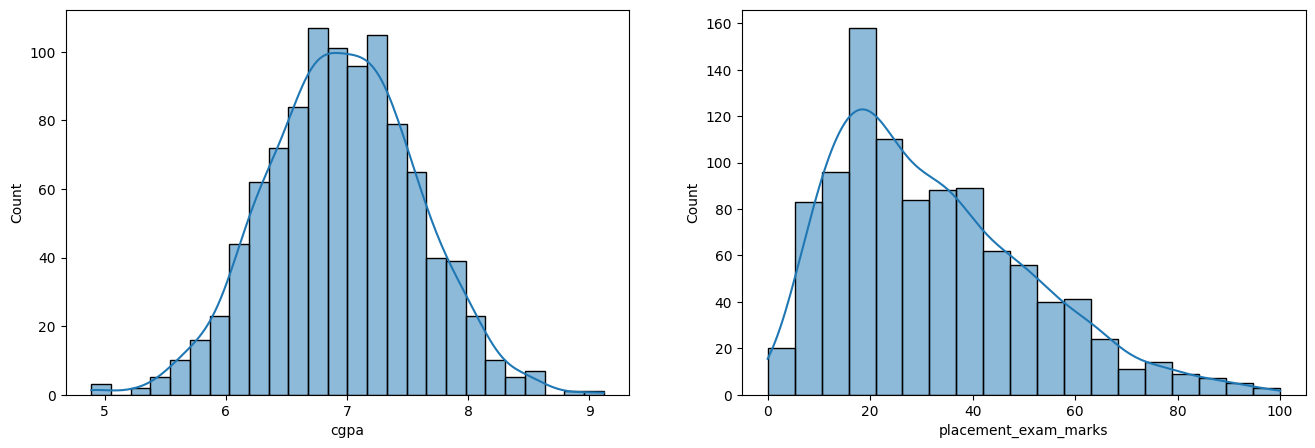

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [18]:
# cpga is close to normal distribution. means we can apply Z-score method to remove outliers
# But marks is little skewed (implies more students get less marks and less student get more marks). so cant apply z-score method
df['placement_exam_marks'].skew()

0.8356419499466834

In [17]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [19]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [20]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [21]:
# Handling them 
# Approach 1: Trimming outliers 

In [22]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [26]:
# Approach 2
# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [27]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [28]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [29]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [31]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [38]:
# Capping : instead of removing ourliers replacing outliers with max and min values

In [33]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [34]:
print(upper_limit)
lower_limit

8.808933625397168


5.113546374602832

In [35]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [36]:
df.shape

(1000, 4)

In [37]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [4]:
# But what if data is not in normal distribution . For skewed data ??? 
# IQR and Box-plot method ----> for skewed distribition data 

In [5]:
df = pd.read_csv('csv files/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


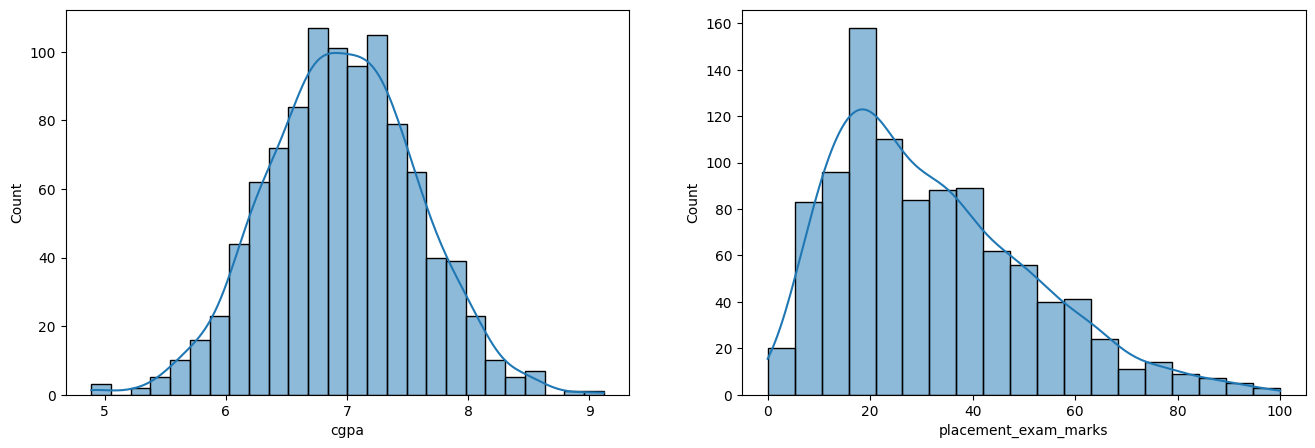

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [7]:
# placement_exam_marks skewed distribution

In [8]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

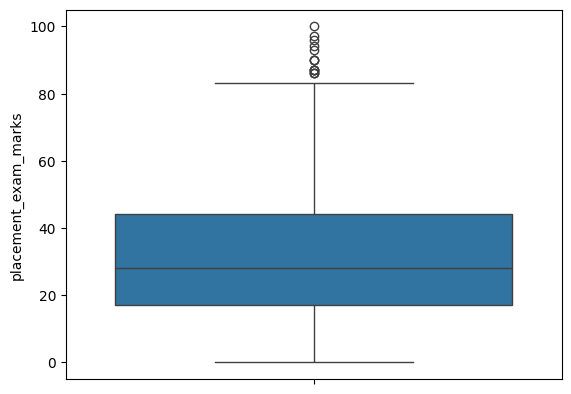

In [9]:
sns.boxplot(df['placement_exam_marks'])

In [10]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

27.0

In [11]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [12]:
# Finding outlier using IQR

In [13]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [14]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [15]:
# Trimming
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape    # -15

(985, 3)

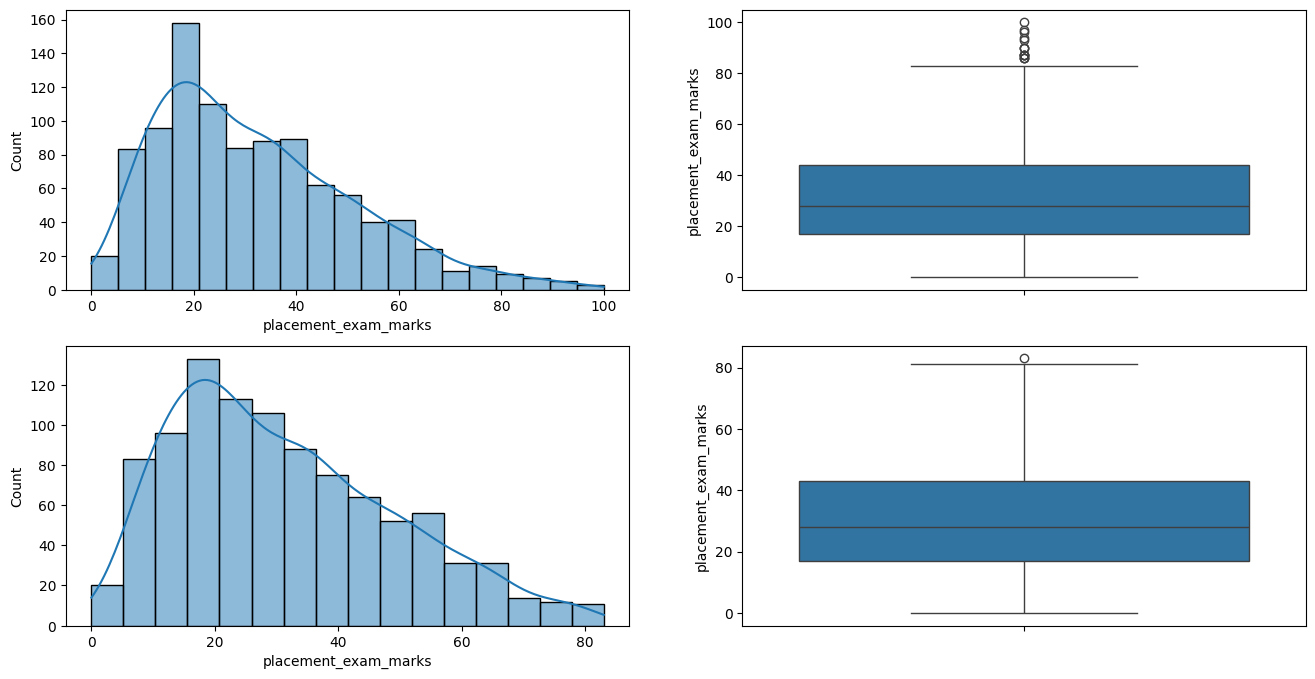

In [18]:
# Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde = True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde = True)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [23]:
                                                                  # Capping
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [24]:
new_df_cap.shape

(1000, 3)

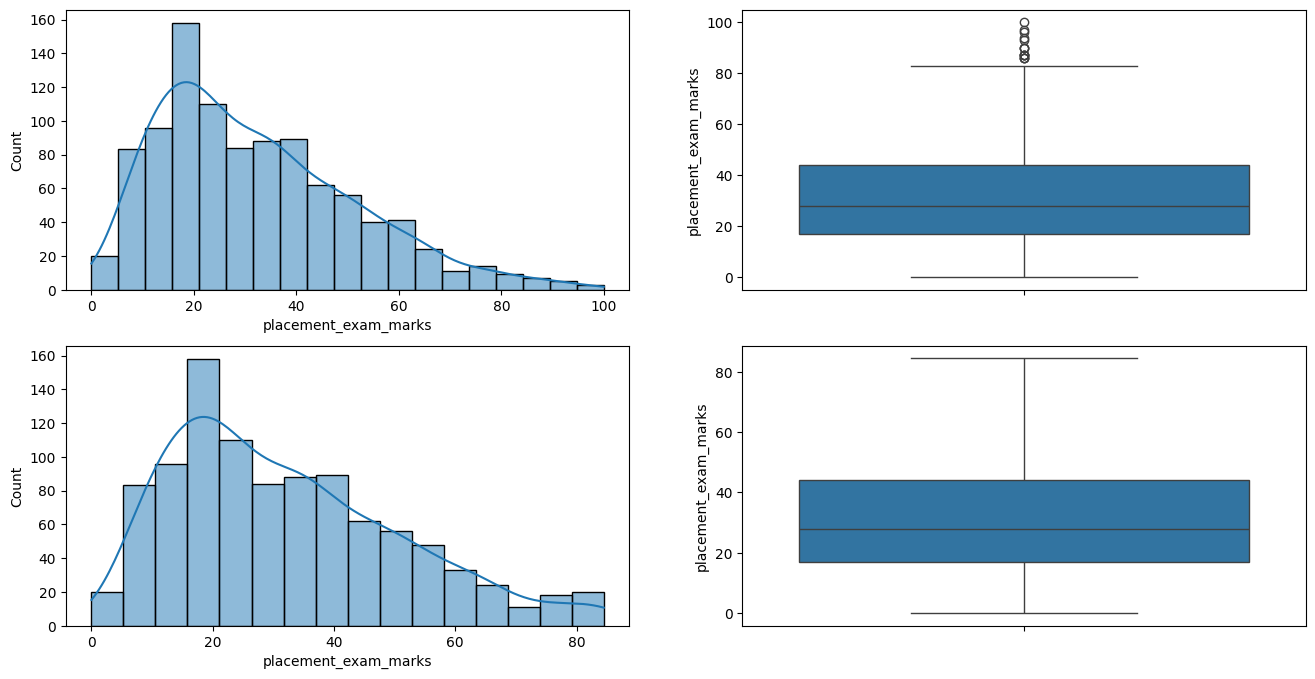

In [25]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

In [1]:
# Outliers detection using percentiles

In [10]:
df = pd.read_csv('csv files/weight-height.csv')
print(df.shape)
df.head()

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

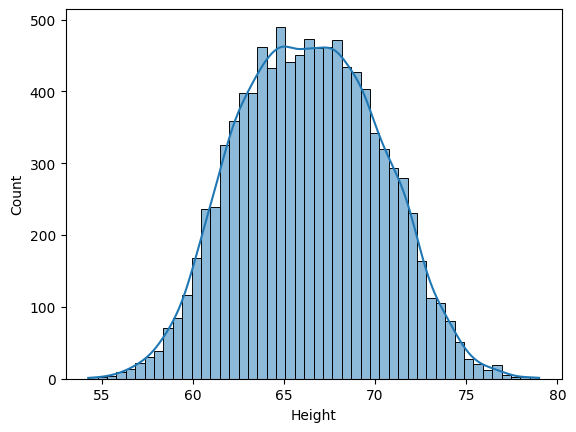

In [15]:
sns.histplot(df['Height'], kde=True)
plt.show()

<Axes: ylabel='Height'>

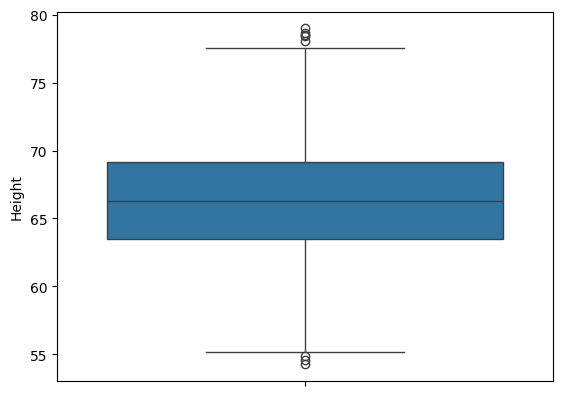

In [16]:
sns.boxplot(df['Height'])

In [19]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)
print(upper_limit, lower_limit)

74.7857900583366 58.13441158671655


In [20]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [21]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [22]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

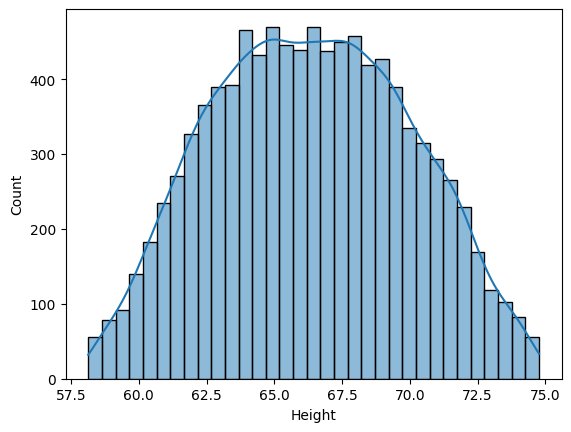

In [25]:
sns.histplot(new_df['Height'], kde=True)

<Axes: ylabel='Height'>

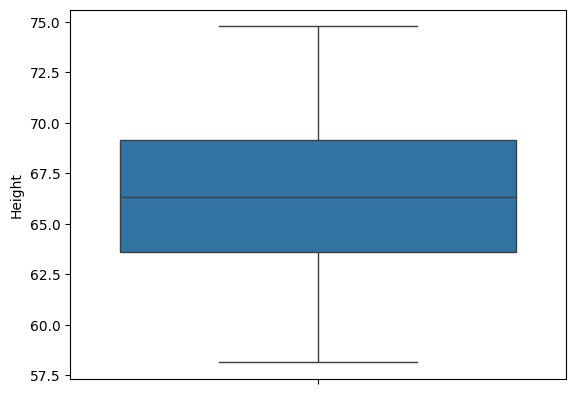

In [26]:
sns.boxplot(new_df['Height'])

In [28]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))
df.shape

(10000, 3)

In [29]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

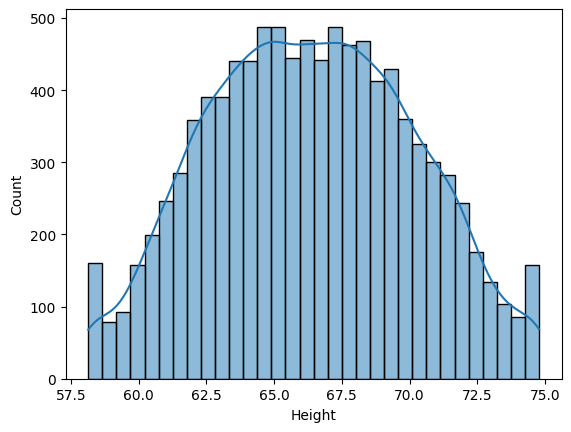

In [30]:
sns.histplot(df['Height'], kde=True)

<Axes: ylabel='Height'>

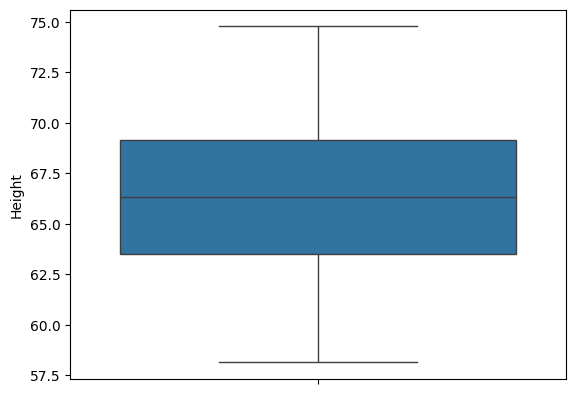

In [31]:
sns.boxplot(df['Height'])